# MAP estimator (Bayesian estimation)

In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['font.size'] = '10'

## Uniform prior
Consider the linear model $x[n]=A+w[n]$ with $w[n]\sim \mathcal{N}(0,\sigma^2)$ and prior $A \sim \mathcal{U}(-A_o,A_o)$.

In [77]:
# Linear model
N = 4
A = 5
sigma = 2
wn = sigma*np.random.randn(N)
xn = A + wn

# Prior Uniform distribution
A_o = 6

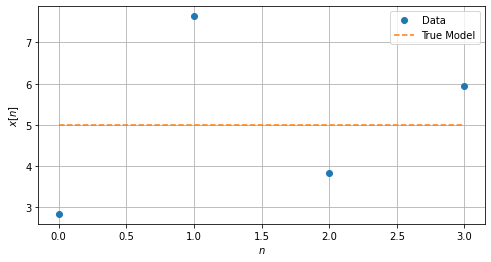

In [78]:
# Plotting data
plt.figure(figsize=[8,4])
plt.plot(xn,'o')
plt.plot([0,N-1],[A,A],'--')
plt.grid('on')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
plt.legend(['Data','True Model']);

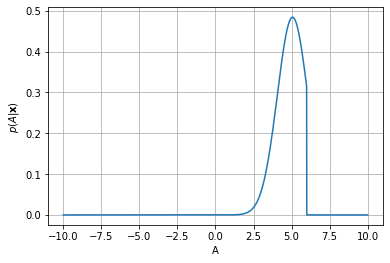

In [79]:
# A posteriori PDF
NA = 2001
Am = np.linspace(-10,10,num=NA)
dA = (Am[NA-1]-Am[0])/(NA-1)
pxA = np.zeros(NA)
for m in range(NA):
    pxA[m] = np.exp(-np.sum((xn-Am[m])**2)/(2*sigma**2))
pA = 1*(np.abs(Am)<A_o) / (2*A_o)
pAx = pxA*pA / (np.sum(pxA*pA)*dA)

# Plotting A posteriori PDF

plt.figure()
plt.plot(Am,pAx)
plt.xlabel('A')
plt.ylabel('$p(A|\mathbf{x})$')
plt.grid('on')

In [80]:
# Calculating the MMSE estimator
A_map = Am[np.argmax(pAx)]

print('Numerically computed MAP')
print('Estimated parameter:',A_map)
print('MAP squared error:',(A_map-A)**2)

# Calculating the MMSE estimator
A_mmse = np.sum(Am*pAx)*dA
b_mmse = np.sum((Am-A_mmse)**2*pAx)*dA

print('Numerically computed MMSE')
print('Estimated MMSE parameter:',A_mmse)
print('Bayesian MSE:',b_mmse)


Numerically computed MAP
Estimated parameter: 5.0600000000000005
MAP squared error: 0.0036000000000000597
Numerically computed MMSE
Estimated MMSE parameter: 4.7499701611164795
Bayesian MSE: 0.6093780400525494
